# Modelo 1: Arvore de decisão

## Adicionando as bibliotecas que usaremos para fazer a arvore de decisao

In [2]:
%matplotlib inline
import math
import os

import matplotlib.pyplot as plt
import numpy as np
from numpy import arange
import pandas as pd

from sklearn.model_selection import train_test_split
import seaborn as sns

from scipy import stats #importa apenas as funções de estatísticas da biblioteca SciPy.

from IPython.display import display  # Para ter melhor print.

___
<div id="definindo decision tree"></div>

### Arvore de Decisao:
Arvore de Decisão é um metodo de machine learning para classificação de uma variavel target a partir da informacao disponivel nas variaveis features.
___

In [3]:
#Criando o nosso DataFrame com os dados do arquivo pokemon.csv
dados = pd.read_csv('pokemon.csv')
dados.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [4]:
print(list(dados)) #Todas as colunas do nosso DataFrame

['abilities', 'against_bug', 'against_dark', 'against_dragon', 'against_electric', 'against_fairy', 'against_fight', 'against_fire', 'against_flying', 'against_ghost', 'against_grass', 'against_ground', 'against_ice', 'against_normal', 'against_poison', 'against_psychic', 'against_rock', 'against_steel', 'against_water', 'attack', 'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate', 'classfication', 'defense', 'experience_growth', 'height_m', 'hp', 'japanese_name', 'name', 'percentage_male', 'pokedex_number', 'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg', 'generation', 'is_legendary']


In [5]:
tipos1 = dados['type1']
l = tipos1.value_counts()

tipos_pokemon=list(l.index) #todos os tipos

print(tipos_pokemon)

['water', 'normal', 'grass', 'bug', 'psychic', 'fire', 'rock', 'electric', 'ground', 'poison', 'dark', 'fighting', 'dragon', 'ghost', 'steel', 'ice', 'fairy', 'flying']


___
Para fazer a nossa Decision Tree,utilizaremos somente os dados numericos disponiveis na nossa base de dados:
___

In [10]:
colunas_numericas = ['type1','attack', 'base_total', 'defense', 'height_m', 'hp','sp_attack', 'sp_defense', 'speed','weight_kg']
dados_numericos=dados.loc[:,colunas_numericas]
#Para implementacao da arvore,as strings dos tipos devem ser trocados por numeros.
#Porem na arvore serao trocados novamente para strings.
dados_numericos['type1'] = dados_numericos['type1'].astype('category')
dados_numericos['type1'].cat.categories = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17] 
dados_numericos

,type1,attack,base_total,defense,height_m,hp,sp_attack,sp_defense,speed,weight_kg
0,9,49,318,49,0.7,45,65,65,45,6.9
1,9,62,405,63,1.0,60,80,80,60,13.0
2,9,100,625,123,2.0,80,122,120,80,100.0
3,6,52,309,43,0.6,39,60,50,65,8.5
4,6,64,405,58,1.1,58,80,65,80,19.0
...,...,...,...,...,...,...,...,...,...,...
796,16,101,570,103,9.2,97,107,101,61,999.9
797,9,181,570,131,0.3,59,59,31,109,0.1
798,1,101,570,53,5.5,223,97,53,43,888.0
799,14,107,600,101,2.4,97,127,89,79,230.0


___
Filtrando os valores para nao dar erro:
___

In [11]:
filtro_Nan = dados_numericos["height_m"].isnull()
filtro_Nan2 = dados_numericos["weight_kg"].isnull()
dados_numericos.loc[filtro_Nan,'height_m'] = 0
dados_numericos.loc[filtro_Nan2,'weight_kg'] = 0
dados_numericos.isnull().sum()

type1         0
attack        0
base_total    0
defense       0
height_m      0
hp            0
sp_attack     0
sp_defense    0
speed         0
weight_kg     0
dtype: int64

___
Separando a base de dados em dados de treinamento e dados de teste
___

In [57]:
dados_train, dados_test = train_test_split(dados_numericos,test_size=0.40, random_state=42)

___
Usando a biblioteca sklearn para construir o classificador
___

In [58]:
from sklearn import tree
X = dados_train[['attack', 'base_total', 'defense', 'height_m', 'hp','sp_attack', 'sp_defense', 'speed','weight_kg']]
Y = dados_train['type1']
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

In [59]:
X_test = dados_test[['attack', 'base_total', 'defense', 'height_m', 'hp','sp_attack', 'sp_defense', 'speed','weight_kg']]
Y_test = dados_test['type1']

___
Utilizamos o comando clf.feature_importances_ para encontrarmos a importancia de cada feature para a predicao do modelo:
___

In [60]:
dicionario = {'column_name':['attack', 'base_total', 'defense', 'height_m', 'hp','sp_attack', 'sp_defense', 'speed','weight_kg'],'feature_importances':list(clf.feature_importances_)}
df = pd.DataFrame(data=dicionario)
df.sort_values("feature_importances",ascending=False)

,column_name,feature_importances
8,weight_kg,0.150568
5,sp_attack,0.137095
1,base_total,0.115391
0,attack,0.114360
2,defense,0.113351
6,sp_defense,0.099567
4,hp,0.094226
7,speed,0.091905
3,height_m,0.083537


Para uma visualizacao da arvore usamos o comando max_depth=5,que 

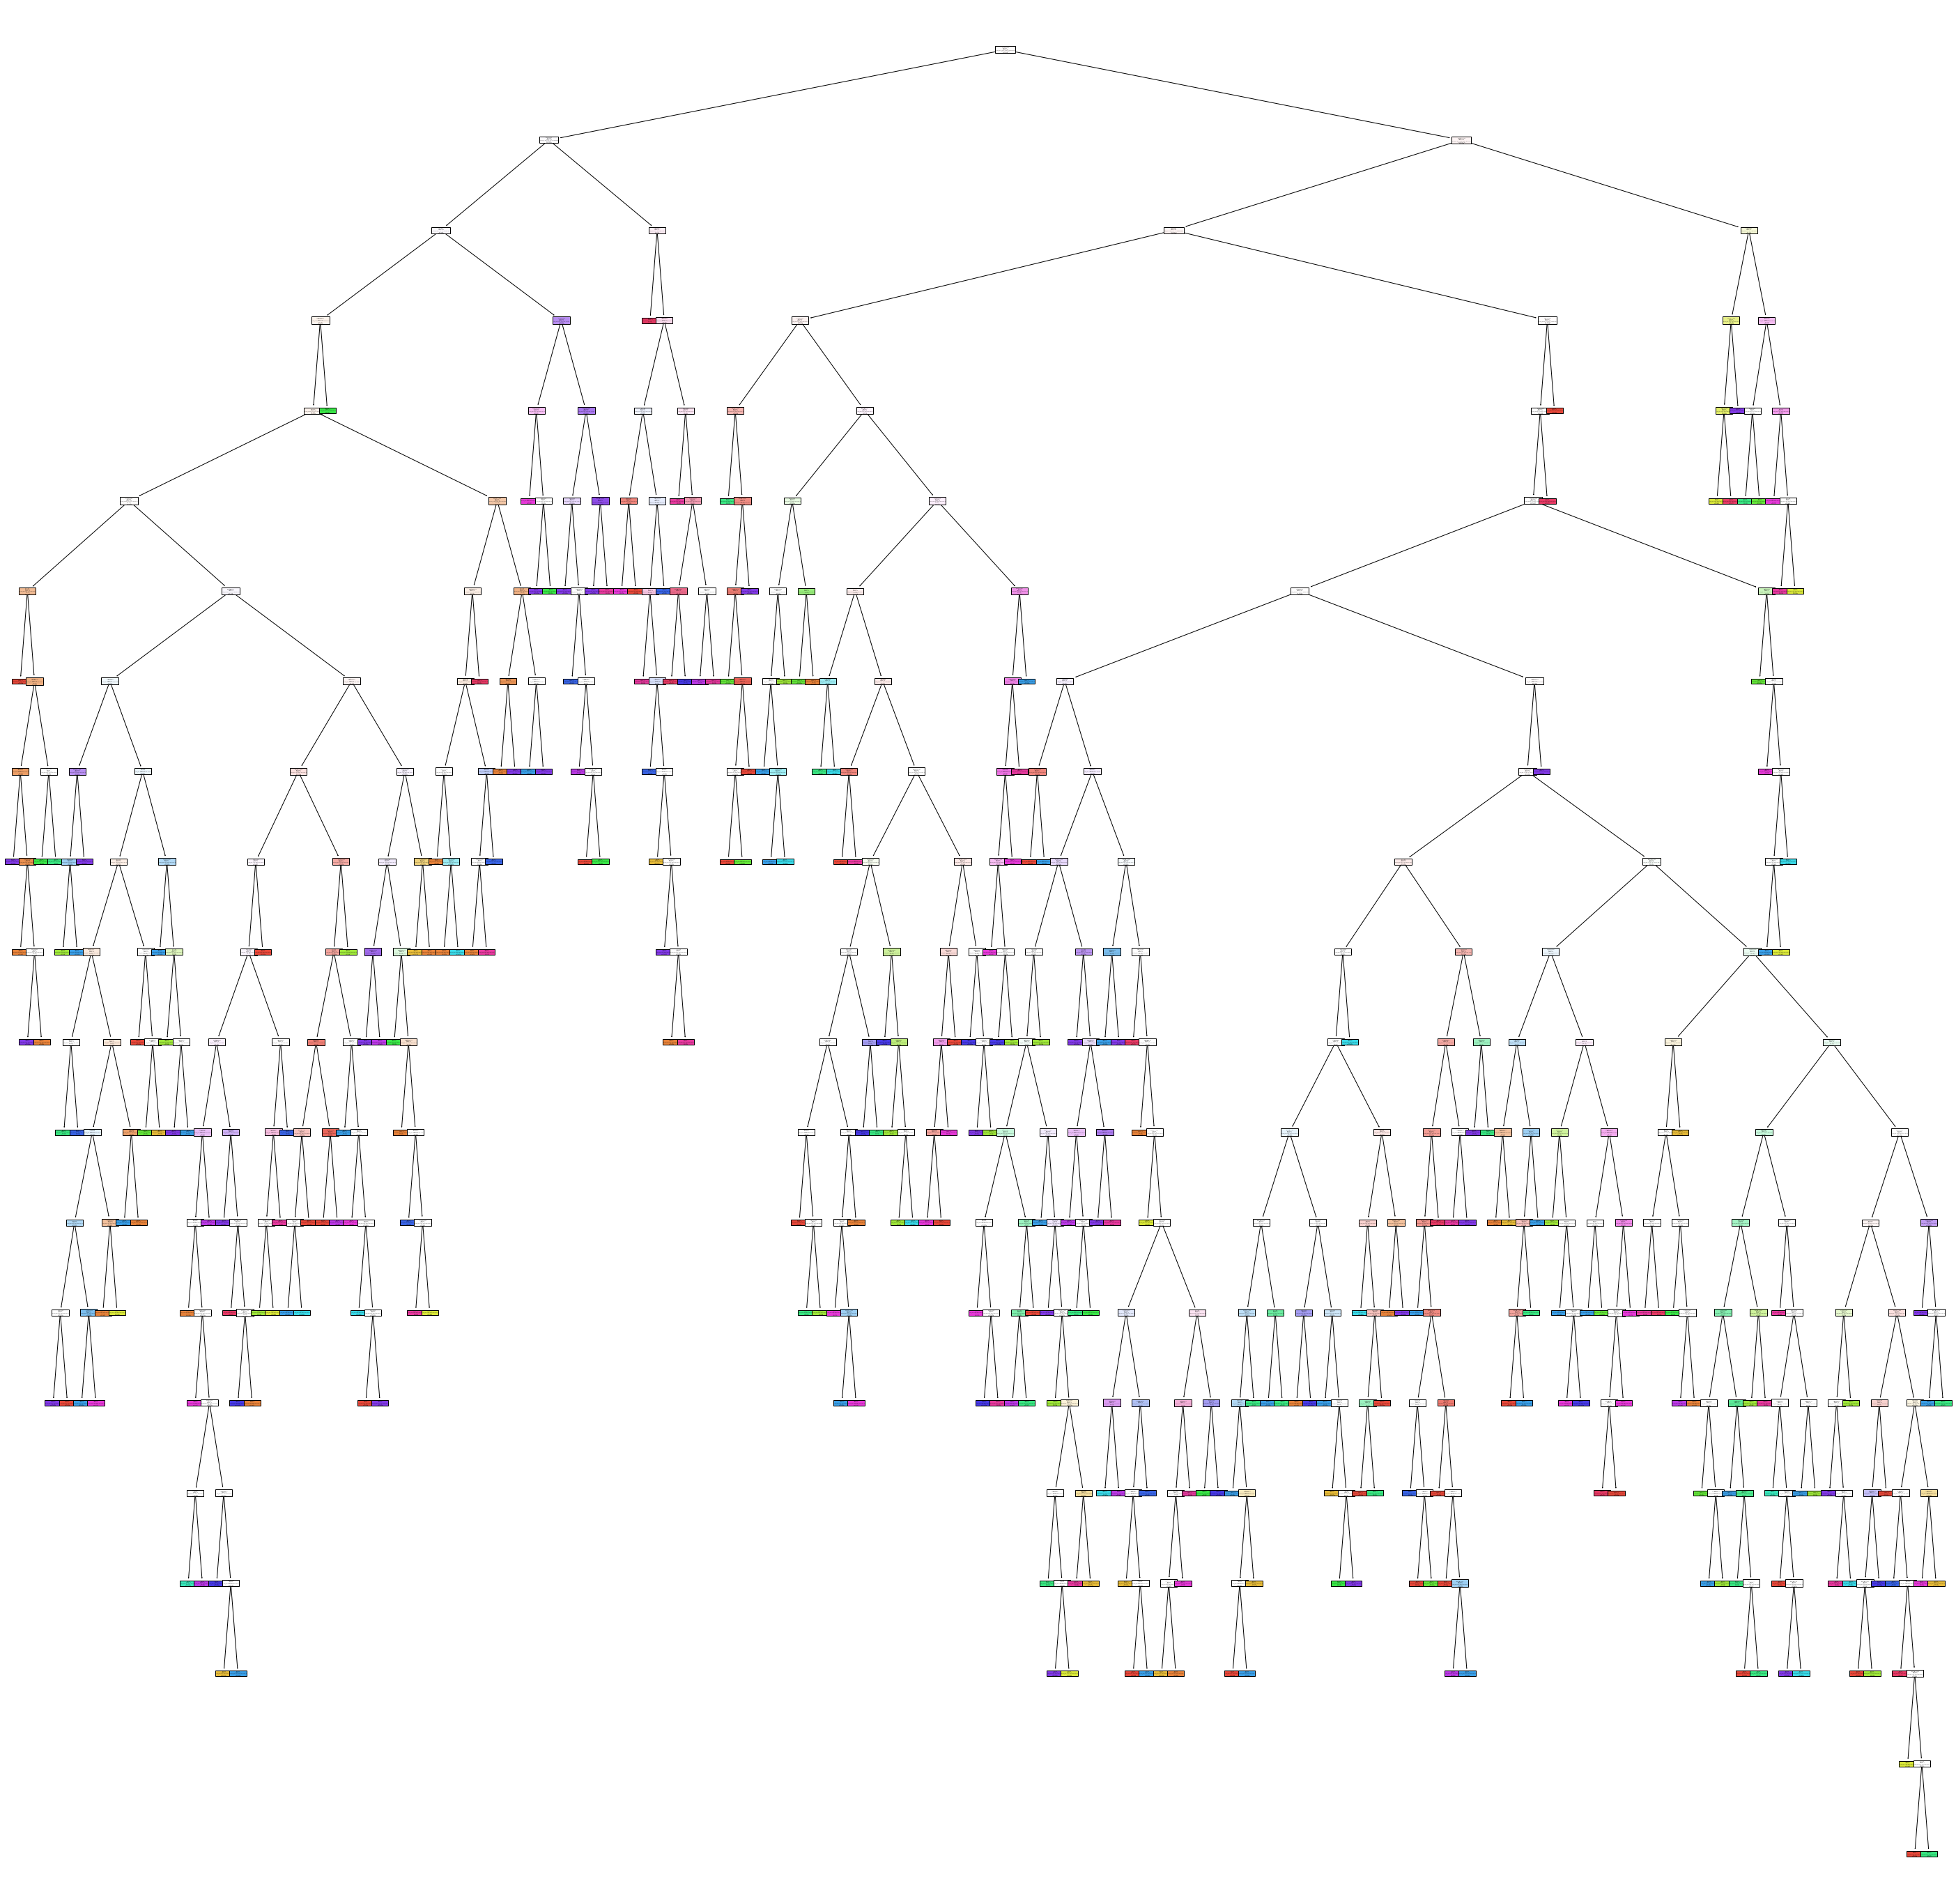

In [71]:
fig = plt.figure(figsize=(50,50))
_ = tree.plot_tree(clf, 
                   feature_names=X.columns,  
                   class_names=tipos_pokemon,
                   filled=True)
fig.savefig("decistion_tree.png")

In [62]:
clf.score(X,Y)

1.0

In [69]:
#Acuracia
clf.score(X_test,Y_test)

0.14330218068535824

In [83]:
from sklearn.metrics import confusion_matrix, classification_report
Y_pred = clf.predict(X_test)
print(classification_report(Y_test, Y_pred))
i=0
tipos_pokemon_alfabetico = ['bug','dark','dragon','electric','fairy','fighting','fire','flying','ghost','grass','ground','ice','normal','poison','psychic','rock','steel','water']
                            
while i < len(tipos_pokemon_alfabetico):
    print("{0} = {1}".format(i,tipos_pokemon_alfabetico[i]))
    i+=1

              precision    recall  f1-score   support

           0       0.14      0.13      0.14        30
           1       0.07      0.09      0.08        11
           2       0.20      0.14      0.17        14
           3       0.00      0.00      0.00        12
           4       0.00      0.00      0.00         5
           5       0.10      0.07      0.08        15
           6       0.11      0.12      0.12        16
           7       1.00      1.00      1.00         1
           8       0.00      0.00      0.00        11
           9       0.13      0.20      0.16        30
          10       0.20      0.20      0.20        15
          11       0.00      0.00      0.00         7
          12       0.33      0.40      0.36        45
          13       0.12      0.06      0.08        17
          14       0.13      0.13      0.13        23
          15       0.00      0.00      0.00        17
          16       0.00      0.00      0.00         5
          17       0.17    

___
# Conclusão
___

Olhando os resultados da classificacao do dataset de teste, podemos perceber que nosso modelo nao ficou muito preciso. Acreditamos que isso é decorrente do fato de que os valores nas colunas das demais variaveis que usamos para prever a variavel do tipo 1 sao muito proximos(podemos ver isso nos graficos de dispersao na "Introducao e Minerando Dados e Características do Dataset") o que dificulta o aprendizado da nossa arvore de decisao.

Na tabela que contem as métricas, temos precision (número de vezes que uma classe foi prevista corretamente), recall (número de vezes que uma classe foi prevista corretamente, pelos números de vezes que a mesma aparece no falso negativo), f1-score (média harmônica entre precisão e revocação), support (número de ocorrências de determinada classe em seu conjunto de dados), accuracy (quantidade de acertos sobre o todo), macro average (calcula f1 para cada rótulo e retorna a média sem considerar a proporção de cada rótulo) e weighted average (calcular f1 para cada rótulo e retorna a média considerando a proporção de cada rótulo).